In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import datetime as dt
from scipy import stats
from sklearn import preprocessing
import pickle

In [4]:
with open('h1.pkl', 'rb') as f:
    h1 = pickle.load(f)
with open('h2.pkl', 'rb') as f:
    h2 = pickle.load(f)

In [4]:
df1=pd.read_csv('drugsComTrain_raw.csv')
df2=pd.read_csv('drugsComTest_raw.csv')

df=pd.concat([df1,df2])
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
df['date'] = pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [27]:
df.loc[df['rating']<=4,'label']=-1
df.loc[(df['rating']>4) & (df['rating']<7),'label']=0
df.loc[df['rating']>=7,'label']=1

In [9]:
fr=df.groupby(['label']).size().reset_index(name='count')

Text(0.5, 1.0, 'no of reviews')

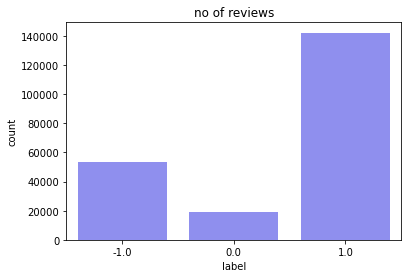

In [10]:
sns.barplot(x=fr['label'],y=fr['count'],color='blue',alpha=0.5)
plt.title('no of reviews')

In [8]:
fr

,label,count
0,-1.0,53572
1,0.0,19185
2,1.0,142306


In [9]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day,label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,1.0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,1.0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,0.0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,1.0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,1.0


In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
from bs4 import BeautifulSoup
import re

In [30]:

# cleaning reviews
stops = set(stopwords.words('english'))
#stops=set(STOPWORDS)
more_stopwords={'one','br','Po','th','sayi','fo','Unknown'}
stops=stops.union(more_stopwords)
not_stop=["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)
    
stemmer=SnowballStemmer('english')

def cl_review(text):
    tr=BeautifulSoup(text,'html.parser').get_text()
    letters_only=re.sub('[^a-zA-Z]',' ',tr)
    words=letters_only.lower().split()
    mw=[w for w in words if not w in stops]
    word_stem=[stemmer.stem(w) for w in mw]
    return(' '.join(word_stem))

#print(cl_review("hello \n\r\8this is going rudrani@#"))

df['review_clean']=df['review'].apply(cl_review)

In [31]:
sampled_review_p = df[df['label'] == 1.0].sample(n = 60000, random_state = 0)
review_0=df[df['label'] == 0.0]
review_1=df[df['label'] == -1.0]


In [32]:
final_df=pd.concat([sampled_review_p,review_0,review_1])
final_df.to_csv('final_df.csv')

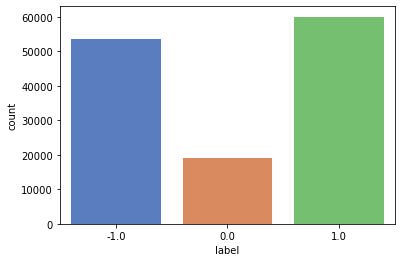

In [16]:
fr1=final_df.groupby(['label']).size().reset_index(name='count')
sns.barplot(x=fr1['label'],y=fr1['count'],palette='muted')
#plt.title('no of reviews')

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [55]:
def logistic_regression(x_train,y_train,x_test,y_test):
    lr=LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000,multi_class='auto',class_weight='balanced')
    lr.fit(x_train,y_train)
    
    y1_pred=lr.predict(x_train)
    y2_pred=lr.predict(x_test)
    
    train_accuracy=accuracy_score(y_train,y1_pred)*100
    test_accuracy=accuracy_score(y_test,y2_pred)*100
    
    return train_accuracy,test_accuracy

def linear_svc(x_train,y_train,x_test,y_test):
    ls=LinearSVC()
    ls.fit(x_train,y_train)
    
    y1_pred=ls.predict(x_train)
    y2_pred=ls.predict(x_test)
    
    train_accuracy=accuracy_score(y_train,y1_pred)*100
    test_accuracy=accuracy_score(y_test,y2_pred)*100
    
    return train_accuracy,test_accuracy

def random_forest(x_train,y_train,x_test,y_test,n_t=100):
    rf=RandomForestClassifier(n_estimators=n_t,class_weight='balanced')
    rf.fit(x_train,y_train)
    
    y1_pred=rf.predict(x_train)
    y2_pred=rf.predict(x_test)
    
    train_accuracy=accuracy_score(y_train,y1_pred)*100
    test_accuracy=accuracy_score(y_test,y2_pred)*100
    
    return train_accuracy,test_accuracy

def multi_nb(x_train,y_train,x_test,y_test):
    lr=MultinomialNB()
    lr.fit(x_train,y_train)
    
    y1_pred=lr.predict(x_train)
    y2_pred=lr.predict(x_test)
    
    train_accuracy=accuracy_score(y_train,y1_pred)*100
    test_accuracy=accuracy_score(y_test,y2_pred)*100
    
    return train_accuracy,test_accuracy

def grad_bo(x_train,y_train,x_test,y_test,n_t=100):
    lr=GradientBoostingClassifier(n_estimators=n_t)
    lr.fit(x_train,y_train)
    
    y1_pred=lr.predict(x_train)
    y2_pred=lr.predict(x_test)
    
    train_accuracy=accuracy_score(y_train,y1_pred)*100
    test_accuracy=accuracy_score(y_test,y2_pred)*100
    
    return train_accuracy,test_accuracy



In [39]:
h1=[]
h2=[]

for i in range(10000,55000,5000): 

    vect=CountVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=i)
    tf=TfidfVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=i)
#tf=TfidfVectorizer(ngram_range=(1,2))

#pipeline=Pipeline([('vect',vect)])

#df_features=pipeline.fit_transform(df['review_clean'])
    df_features1=vect.fit_transform(final_df['review_clean'])
    df_features2=tf.fit_transform(final_df['review_clean'])

    h1.append(df_features1)
    h2.append(df_features2)
    #X_train, X_test, y_train, y_test=train_test_split(df_features1, df['label'], test_size=0.25, random_state=0)


In [40]:
import pickle
with open('h1.pkl', 'wb') as fp:
    pickle.dump(h1, fp)
with open('h2.pkl', 'wb') as fp:
    pickle.dump(h2, fp)

In [41]:
#multinomial nb

num_features=10000

train_acc_cv=[]
test_acc_cv=[]
train_acc_tf=[]
test_acc_tf=[]


for i in range(9):
    
    print("loop=",i)
#     [train_x1,test_x1]=ngram_features(min_ngram, max_ngram, X_train, X_test, i)
#     [train_x2,test_x2]=tf_features(min_ngram, max_ngram, X_train, X_test, i)
#     print("hello")
#     X_train, X_test, y_train, y_test=train_test_split(h1[i], df['label'], test_size=0.25, random_state=0)
    X_train1, X_test1, y_train1, y_test1=train_test_split(h1[i], final_df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(h2[i], final_df['label'], test_size=0.25, random_state=0)

    [a1,b1]=multi_nb(X_train1,y_train1,X_test1,y_test1)
    [a2,b2]=multi_nb(X_train2,y_train2,X_test2,y_test2)
    
    train_acc_cv.append(a1)
    test_acc_cv.append(b1)
    train_acc_tf.append(a2)
    test_acc_tf.append(b2)

loop= 0
loop= 1
loop= 2
loop= 3
loop= 4
loop= 5
loop= 6
loop= 7
loop= 8


Text(0, 0.5, 'accuracy %')

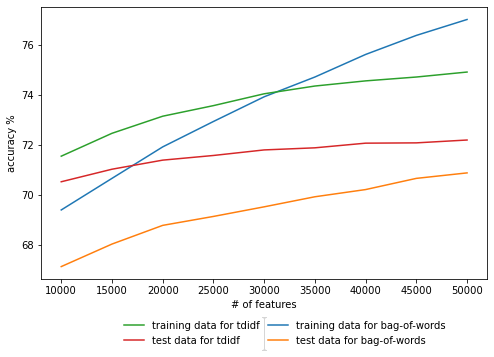

In [42]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv1,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv1,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf1, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf1, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv,palette='dark',label="training data for bag-of-words")
sns.lineplot(n,test_acc_cv,palette='dark',label="test data for bag-of-words")
sns.lineplot(n,train_acc_tf, palette='dark',label="training data for tdidf")
sns.lineplot(n,test_acc_tf, palette='dark',label="test data for tdidf")


#box = plt.get_position()
#plt.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])

#plt.legend(loc="upper left",prop={"size":8})
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='center', borderaxespad=0.,ncol=2, mode="expand")
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [51]:
print(train_acc_cv)
print(test_acc_cv)
print(train_acc_tf)
print(test_acc_tf)

[69.3954824389607, 70.66297066297066, 71.92644149165889, 72.94585555455122, 73.93714785019134, 74.7305834262356, 75.63650607128868, 76.40081553125032, 77.03958138740748]
[67.12262729737873, 68.02651401024406, 68.77673998192226, 69.13528171135884, 69.52094004218138, 69.92467610726122, 70.21391985537812, 70.66285025610124, 70.88279602289846]
[71.55382807556721, 72.47180290658551, 73.15777315777315, 73.5826127130475, 74.05766970984362, 74.36901784727871, 74.57591370634849, 74.7305834262356, 74.93044884349233]
[70.52726724917143, 71.03043085266647, 71.39499849352214, 71.5818017475143, 71.8047604700211, 71.88912322988853, 72.07592648388069, 72.0879783067189, 72.20247062368183]


In [53]:
from statistics import mean

print(mean(train_acc_cv))
print(mean(test_acc_cv))
print(mean(train_acc_tf))
print(mean(test_acc_tf))

73.63059826827943
69.36292725385826
73.71440559846357
71.62163971745171


In [48]:
#for logistic regression

min_ngram=1
max_ngram=2

num_features=10000

train_acc_cv1=[]
test_acc_cv1=[]
train_acc_tf1=[]
test_acc_tf1=[]


for i in range(9):
    
    print("no of features=",i)
    X_train1, X_test1, y_train1, y_test1=train_test_split(h1[i], final_df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(h2[i], final_df['label'], test_size=0.25, random_state=0)

    
    [a1,b1]=logistic_regression(X_train1,y_train1,X_test1,y_test1)
    [a2,b2]=logistic_regression(X_train2,y_train2,X_test2,y_test2)
    
    train_acc_cv1.append(a1)
    test_acc_cv1.append(b1)
    train_acc_tf1.append(a2)
    test_acc_tf1.append(b2)

no of features= 0
no of features= 1
no of features= 2
no of features= 3
no of features= 4
no of features= 5
no of features= 6
no of features= 7
no of features= 8


Text(0, 0.5, 'accuracy %')

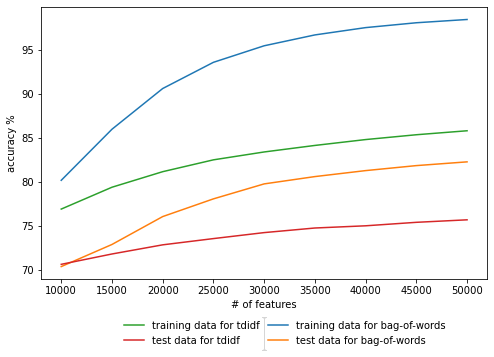

In [49]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv1,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv1,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf1, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf1, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv1,palette='dark',label="training data for bag-of-words")
sns.lineplot(n,test_acc_cv1,palette='dark',label="test data for bag-of-words")
sns.lineplot(n,train_acc_tf1, palette='dark',label="training data for tdidf")
sns.lineplot(n,test_acc_tf1, palette='dark',label="test data for tdidf")


#box = plt.get_position()
#plt.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])

#plt.legend(loc="upper left",prop={"size":8})
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='center', borderaxespad=0.,ncol=2, mode="expand")
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [54]:
print(train_acc_cv1)
print(test_acc_cv1)
print(train_acc_tf1)
print(test_acc_tf1)

[80.2113149939237, 85.99837295489469, 90.6123514819167, 93.58221097351532, 95.45632589110849, 96.68665320839234, 97.51524099350186, 98.06562415258068, 98.43522452218104]
[70.43386562217535, 72.94064477252185, 76.10123531184092, 78.10786381440192, 79.80415787887918, 80.63272069900572, 81.3106357336547, 81.87707140705032, 82.30189816209702]
[76.95119869032912, 79.42691855735335, 81.18854640593771, 82.53035644339992, 83.42322255365734, 84.16242329285808, 84.82830656743701, 85.37467233119406, 85.82562495605974]
[70.68996685748719, 71.86200662850256, 72.89846339258813, 73.60650798433262, 74.28442301898161, 74.80566435673396, 75.0557396806267, 75.45043687857789, 75.73365471527569]


In [55]:
print(mean(train_acc_cv1))
print(mean(test_acc_cv1))
print(mean(train_acc_tf1))
print(mean(test_acc_tf1))

92.95147990800164
78.16778815573633
82.63458553313626
73.82076261256738


In [56]:
#for random forest

train_acc_cv2=[]
test_acc_cv2=[]
train_acc_tf2=[]
test_acc_tf2=[]

for i in range(9):
    
    print("no of features=",i)
    X_train1, X_test1, y_train1, y_test1=train_test_split(h1[i], final_df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(h2[i], final_df['label'], test_size=0.25, random_state=0)

    
    [a1,b1]=random_forest(X_train1,y_train1,X_test1,y_test1,10)
    [a2,b2]=random_forest(X_train2,y_train2,X_test2,y_test2,10)
    
    train_acc_cv2.append(a1)
    test_acc_cv2.append(b1)
    train_acc_tf2.append(a2)
    test_acc_tf2.append(b2)
    

no of features= 0
no of features= 1
no of features= 2
no of features= 3
no of features= 4
no of features= 5
no of features= 6
no of features= 7
no of features= 8


Text(0, 0.5, 'accuracy %')

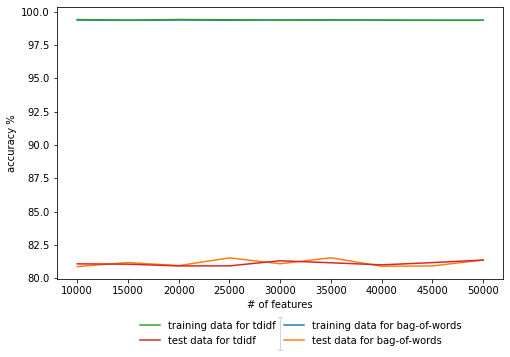

In [57]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv2,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv2,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf2, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf2, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv2,palette='dark',label="training data for bag-of-words")
sns.lineplot(n,test_acc_cv2,palette='dark',label="test data for bag-of-words")
sns.lineplot(n,train_acc_tf2, palette='dark',label="training data for tdidf")
sns.lineplot(n,test_acc_tf2, palette='dark',label="test data for tdidf")
#plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='center', borderaxespad=0.,ncol=2, mode="expand")

plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [58]:
print(train_acc_cv2)
print(test_acc_cv2)
print(train_acc_tf2)
print(test_acc_tf2)

[99.36926893448631, 99.35119065553847, 99.37328632980807, 99.35420370202979, 99.3742906786385, 99.3883515622646, 99.3572167485211, 99.3602297950124, 99.3572167485211]
[80.87677011147936, 81.18107863814402, 80.94908104850859, 81.53058150045194, 81.08767701114795, 81.5396203675806, 80.90388671286533, 80.92497740283218, 81.37089484784573]
[99.40944288770376, 99.36223849267327, 99.41245593419507, 99.39136460875592, 99.3602297950124, 99.37328632980807, 99.36926893448631, 99.35219500436891, 99.35219500436891]
[81.08165109972883, 81.05754745405243, 80.92799035854173, 80.93100331425129, 81.31364868936427, 81.16300090388671, 81.00632720699006, 81.17505272672491, 81.36486893642663]


In [59]:
print(mean(train_acc_cv2))
print(mean(test_acc_cv2))
print(mean(train_acc_tf2))
print(mean(test_acc_tf2))

99.3650283505356
81.15161862676175
99.3758529990414
81.11345452110743


In [60]:
train_acc_cv3=[]
test_acc_cv3=[]
train_acc_tf3=[]
test_acc_tf3=[]

for i in range(9):
    
    print("no of features=",i)
    X_train1, X_test1, y_train1, y_test1=train_test_split(h1[i], final_df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(h2[i], final_df['label'], test_size=0.25, random_state=0)

    
    [a1,b1]=random_forest(X_train1,y_train1,X_test1,y_test1,50)
    [a2,b2]=random_forest(X_train2,y_train2,X_test2,y_test2,50)
    
    train_acc_cv3.append(a1)
    test_acc_cv3.append(b1)
    train_acc_tf3.append(a2)
    test_acc_tf3.append(b2)

no of features= 0
no of features= 1
no of features= 2
no of features= 3
no of features= 4
no of features= 5
no of features= 6
no of features= 7
no of features= 8


Text(0, 0.5, 'accuracy %')

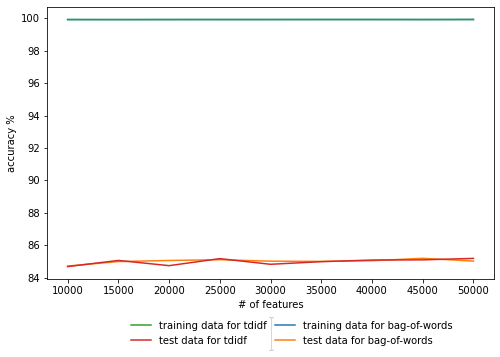

In [61]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv3,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv3,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf3, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf3, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv3,palette='dark',label="training data for bag-of-words")
sns.lineplot(n,test_acc_cv3,palette='dark',label="test data for bag-of-words")
sns.lineplot(n,train_acc_tf3, palette='dark',label="training data for tdidf")
sns.lineplot(n,test_acc_tf3, palette='dark',label="test data for tdidf")
#plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='center', borderaxespad=0.,ncol=2, mode="expand")

plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [62]:
print(train_acc_cv3)
print(test_acc_cv3)
print(train_acc_tf3)
print(test_acc_tf3)

[99.92366948888687, 99.92065644239557, 99.92366948888687, 99.92366948888687, 99.92366948888687, 99.92567818654776, 99.92567818654776, 99.921660791226, 99.92668253537819]
[84.70924977402832, 84.98644169930702, 85.05272672491715, 85.10093401626996, 85.01054534498343, 84.99548056643567, 85.0376619463694, 85.18830973184694, 85.01355830069298]
[99.921660791226, 99.921660791226, 99.92266514005644, 99.92467383771732, 99.92467383771732, 99.92567818654776, 99.92567818654776, 99.92467383771732, 99.92668253537819]
[84.67610726122325, 85.0557396806267, 84.73335341970473, 85.16721904188009, 84.81771617957216, 84.98041578788792, 85.0798433263031, 85.09189514914131, 85.18228382042784]


In [63]:
print(mean(train_acc_cv3))
print(mean(test_acc_cv3))
print(mean(train_acc_tf3))
print(mean(test_acc_tf3))

99.92389267751587
85.01054534498343
99.92422746045935
84.9760637407519


In [19]:
train_acc_cv4=[]
test_acc_cv4=[]
train_acc_tf4=[]
test_acc_tf4=[]

for i in range(9):
    
    print("no of features=",i)
    X_train1, X_test1, y_train1, y_test1=train_test_split(h1[i], final_df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(h2[i], final_df['label'], test_size=0.25, random_state=0)

    
    [a1,b1]=random_forest(X_train1,y_train1,X_test1,y_test1,100)
    [a2,b2]=random_forest(X_train2,y_train2,X_test2,y_test2,100)
    
    train_acc_cv4.append(a1)
    test_acc_cv4.append(b1)
    train_acc_tf4.append(a2)
    test_acc_tf4.append(b2)

no of features= 0
no of features= 1
no of features= 2
no of features= 3
no of features= 4
no of features= 5
no of features= 6
no of features= 7
no of features= 8


Text(0, 0.5, 'accuracy %')

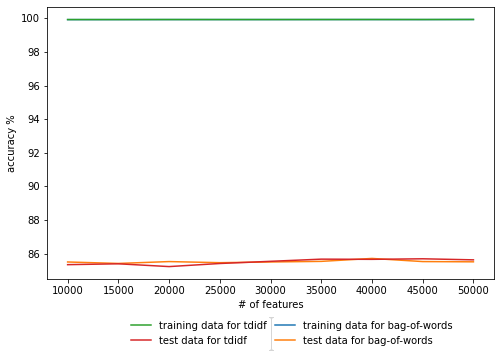

In [20]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv4,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv4,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf4, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf4, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv4,palette='dark',label="training data for bag-of-words")
sns.lineplot(n,test_acc_cv4,palette='dark',label="test data for bag-of-words")
sns.lineplot(n,train_acc_tf4, palette='dark',label="training data for tdidf")
sns.lineplot(n,test_acc_tf4, palette='dark',label="test data for tdidf")

#plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='center', borderaxespad=0.,ncol=2, mode="expand")

plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [21]:
print(train_acc_cv4)
print(test_acc_cv4)
print(train_acc_tf4)
print(test_acc_tf4)

[99.921660791226, 99.92366948888687, 99.92567818654776, 99.92567818654776, 99.92567818654776, 99.92668253537819, 99.92668253537819, 99.92467383771732, 99.92869123303906]
[85.4986441699307, 85.41126845435372, 85.52274781560712, 85.45646278999699, 85.4986441699307, 85.5347996384453, 85.70955106959927, 85.52274781560712, 85.50768303705935]
[99.92467383771732, 99.92366948888687, 99.92567818654776, 99.92467383771732, 99.92467383771732, 99.92567818654776, 99.92668253537819, 99.92668253537819, 99.92869123303906]
[85.3389575173245, 85.39017776438686, 85.22446520036155, 85.40825549864417, 85.53781259415486, 85.66736968966556, 85.65531786682736, 85.68846037963242, 85.62518830973185]


In [23]:
from statistics import mean

print(mean(train_acc_cv4))
print(mean(test_acc_cv4))
print(mean(train_acc_tf4))
print(mean(test_acc_tf4))

99.92545499791876
85.51806099561448
99.92567818654776
85.50400053563656


In [24]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv1,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv1,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf1, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf1, "-c",label="test data for tdif")

sns.lineplot(n,test_acc_cv2,palette='dark',label="test data-bag-of-words, #of trees=10")
sns.lineplot(n,test_acc_tf2,palette='dark',label="test data-tdidf, # of trees=10")
sns.lineplot(n,test_acc_cv3, palette='dark',label="test data-bag-of-words, # of trees=50")
sns.lineplot(n,test_acc_tf3, palette='dark',label="test data-tdidf, # of trees=50")
sns.lineplot(n,test_acc_cv4, palette='dark',label="test data-bag-of-words, # of trees=100")
sns.lineplot(n,test_acc_tf4, palette='dark',label="test data-tdidf, # of trees=100")


#box = plt.get_position()
#plt.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])

#plt.legend(loc="upper left",prop={"size":8})
plt.legend(bbox_to_anchor=(0.5,-0.25), loc='center', borderaxespad=0.,ncol=2, mode="expand")
#plt.title("line chart of e")
plt.xlabel("# of features")
plt.ylabel("accuracy %")

NameError: name 'test_acc_cv2' is not defined

<Figure size 576x360 with 0 Axes>

In [56]:
#gb

train_acc_cv5=[]
test_acc_cv5=[]
train_acc_tf5=[]
test_acc_tf5=[]

r=[100,150,200,500,750,1000,1500,2000]

for i in r:
    
    print("no of features=",i)
    X_train1, X_test1, y_train1, y_test1=train_test_split(h1[0], final_df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(h2[0], final_df['label'], test_size=0.25, random_state=0)

    
    [a1,b1]=grad_bo(X_train1,y_train1,X_test1,y_test1,i)
    [a2,b2]=grad_bo(X_train2,y_train2,X_test2,y_test2,i)
    
    train_acc_cv5.append(a1)
    test_acc_cv5.append(b1)
    train_acc_tf5.append(a2)
    test_acc_tf5.append(b2)

no of features= 100
no of features= 150
no of features= 200
no of features= 500
no of features= 750
no of features= 1000


KeyboardInterrupt: 

Text(0, 0.5, 'accuracy %')

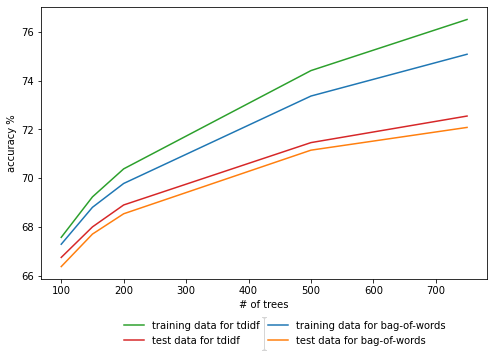

In [57]:
plt.figure(figsize=(8,5))
r=[100,150,200,500,750]
sns.lineplot(r,train_acc_cv5,palette='dark',label="training data for bag-of-words")
sns.lineplot(r,test_acc_cv5,palette='dark',label="test data for bag-of-words")
sns.lineplot(r,train_acc_tf5, palette='dark',label="training data for tfidf")
sns.lineplot(r,test_acc_tf5, palette='dark',label="test data for tfidf")

#plt.legend(loc="upper left",prop={"size":8})
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='center', borderaxespad=0.,ncol=2, mode="expand")

#plt.title("line chart of e")
plt.xlabel("# of trees")
plt.ylabel("accuracy %")

In [58]:
print(train_acc_cv5)
print(test_acc_cv5)
print(train_acc_tf5)
print(test_acc_tf5)

[67.28735424387598, 68.80392097783403, 69.78316108750892, 73.37370815631685, 75.09014030753161]
[66.36938836999096, 67.70412774932208, 68.53871648086773, 71.15094908104851, 72.08496535100934]
[67.57058061405887, 69.23177357959966, 70.38275733927908, 74.41923528880051, 76.51731999558086]
[66.74600783368484, 67.99939740885809, 68.90027116601387, 71.46128351913227, 72.55197348598975]


In [60]:
from statistics import mean
print(mean(train_acc_cv5))
print(mean(test_acc_cv5))
print(mean(train_acc_tf5))
print(mean(test_acc_tf5))

70.86765695461348
69.16962940644773
71.62433336346379
69.53178668273576


In [29]:
X_train1, X_test1, y_train1, y_test1=train_test_split(h1[4], final_df['label'], test_size=0.25, random_state=0)
X_train2, X_test2, y_train2, y_test2=train_test_split(h2[4], final_df['label'], test_size=0.25, random_state=0)

lr1=LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000,multi_class='auto',class_weight='balanced')
lr1.fit(X_train1,y_train1)
#lr2=LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000,multi_class='auto',class_weight='balanced')
#lr2.fit(x_train2,y_train2)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
lr1.coef_[0]

array([ 0.29175174,  0.42571184, -0.36055069, ..., -0.8999434 ,
        0.19323613, -0.17448991])

In [35]:
coefs=lr1.coef_[0]
top_3=np.argpartition(coefs, -3)[-3:]
top_31=top_3[np.argsort(coefs[top_3])]

In [47]:
vect=CountVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=30000)
df_features1=vect.fit_transform(final_df['review_clean'])

In [50]:
vect.get_feature_names()

['aa',
 'ab',
 'abat',
 'abdomen',
 'abdomen pain',
 'abdomin',
 'abdomin area',
 'abdomin cramp',
 'abdomin discomfort',
 'abdomin pain',
 'abil',
 'abil focus',
 'abil function',
 'abilifi',
 'abilifi mg',
 'abilifi month',
 'abilifi work',
 'abilifi year',
 'abl',
 'abl breath',
 'abl complet',
 'abl concentr',
 'abl continu',
 'abl control',
 'abl cope',
 'abl deal',
 'abl drink',
 'abl drive',
 'abl eat',
 'abl enjoy',
 'abl fall',
 'abl feel',
 'abl find',
 'abl focus',
 'abl function',
 'abl get',
 'abl go',
 'abl handl',
 'abl help',
 'abl hold',
 'abl keep',
 'abl leav',
 'abl live',
 'abl lose',
 'abl maintain',
 'abl make',
 'abl manag',
 'abl move',
 'abl quit',
 'abl say',
 'abl see',
 'abl sex',
 'abl sit',
 'abl sleep',
 'abl stand',
 'abl stay',
 'abl stop',
 'abl take',
 'abl talk',
 'abl thing',
 'abl think',
 'abl toler',
 'abl use',
 'abl walk',
 'abl wear',
 'abl work',
 'ablat',
 'abnorm',
 'abnorm bleed',
 'abnorm period',
 'abort',
 'abreva',
 'abroad',
 'abrupt

In [52]:
vect.get_feature_names[top_31]

TypeError: 'method' object is not subscriptable

In [62]:
CoefNames = list(zip(lr1.coef_[0], vect.get_feature_names()))
CoefNames.sort(reverse=True)
print(CoefNames[:10])
print(CoefNames[-10:])

[(1.9850892926745691, 'help thank'), (1.8990307014582792, 'much drug'), (1.848898444063551, 'day sick'), (1.7356433657645887, 'caus serious'), (1.7040491080304216, 'cramp everyday'), (1.701468972274204, 'emot state'), (1.6825657596862325, 'dose within'), (1.6786398773009845, 'eighteen'), (1.652030195516038, 'tri reduc'), (1.6435814794512165, 'middl pack')]
[(-1.5743808878674448, 'worthless'), (-1.5964311724574638, 'bad review'), (-1.6348502210483558, 'anxious feel'), (-1.63773316103638, 'point get'), (-1.654328097010876, 'stop want'), (-1.6591172643656662, 'bloat weight'), (-1.7078330390211274, 'month littl'), (-1.7530366939230906, 'sinc month'), (-1.7698540450388256, 'blockag'), (-1.854849724835316, 'think like')]


In [64]:
lr1.coef_

array([[ 0.29175174,  0.42571184, -0.36055069, ..., -0.8999434 ,
         0.19323613, -0.17448991],
       [-0.21716062,  0.16364198, -0.24852912, ...,  0.23087207,
         0.03243212,  0.38883143],
       [-0.07459112, -0.58935383,  0.60907981, ...,  0.66907132,
        -0.22566825, -0.21434152]])

In [65]:
lr1.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [66]:
tf=TfidfVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=30000)
df_features2=tf.fit_transform(final_df['review_clean'])

In [68]:
lr2=LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000,multi_class='auto',class_weight='balanced')
lr2.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
CoefNames = list(zip(lr2.coef_[0], tf.get_feature_names()))
CoefNames.sort(reverse=True)
print(CoefNames[:10])
print(CoefNames[-10:])

[(2.556174336250888, 'decid'), (1.5509705836518786, 'constant'), (1.37531524405665, 'crave'), (1.2790181005726338, 'drop'), (1.1935075913527535, 'panic attack'), (1.1398319224660116, 'twice'), (1.1035186133533452, 'review'), (1.0813837652958667, 'go back'), (1.0678020808004631, 'thing'), (0.9819409701859775, 'could')]
[(-0.9463320096011908, 'posit'), (-0.9492481815876578, 'product'), (-0.9662220332950753, 'swing'), (-1.0051614172581658, 'dosag'), (-1.1145713808994484, 'pill'), (-1.1324096540817097, 'dizzi'), (-1.1943061160889716, 'no'), (-1.2110435269987068, 'gain'), (-1.4250207216961783, 'anxieti'), (-2.0209468455507973, 'realiz')]


In [22]:
#final_df=pd.read_csv('final_df.csv')

In [24]:
#final_df.head()

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day,label,review_clean
0,134647,50190,Gabapentin,Anxiety,"""After a hard divorce at a young age I became ...",9,2015-01-16,285,2015,1,16,1.0,hard divorc young age becam addict med search ...
1,160183,161501,Diphenhydramine,Nausea/Vomiting,"""I got a severe back injury about 2 years ago....",10,2015-12-20,43,2015,12,20,1.0,got sever back injuri year ago function pain b...
2,47174,179004,Victoza,"Diabetes, Type 2","""I have been on Victoza for quite some time ta...",10,2011-09-18,11,2011,9,18,1.0,victoza quit time take not bother lost lbs sin...
3,132349,164479,Diclofenac,Back Pain,"""Used 75mg Voltaren twice a day as a maintenan...",10,2014-03-01,31,2014,3,1,1.0,use mg voltaren twice day mainten pain problem...
4,17604,158983,TriNessa,Birth Control,"""I haven&#039;t had any of the horrible side e...",10,2016-07-07,11,2016,7,7,1.0,horribl side effect alot peopl wrote almost fi...


In [6]:
X_train1, X_test1, y_train1, y_test1=train_test_split(h1[4], final_df['label'], test_size=0.25, random_state=0)
X_train2, X_test2, y_train2, y_test2=train_test_split(h2[4], final_df['label'], test_size=0.25, random_state=0)

In [9]:
rf=RandomForestClassifier(n_estimators=100,class_weight='balanced')
rf.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
vect=CountVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=30000)
tf=TfidfVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=30000)
df_features1=vect.fit_transform(final_df['review_clean'])
df_features2=tf.fit_transform(final_df['review_clean'])

In [12]:
rf.feature_importances_

array([1.42795768e-05, 3.14317693e-06, 1.35630320e-05, ...,
       1.43500323e-05, 4.12256797e-05, 4.89567670e-05])

In [13]:
important_features_dict = {}
for x,i in enumerate(rf.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print ('Most important features: %s' %important_features_list)

Most important features: [29631, 28980, 17787, 10824, 13771, 14647, 29251, 2472, 25002, 5026, 17485, 29332, 7066, 24236, 960, 16164, 17138, 11901, 11480, 15649, 18730, 17640, 23697, 16057, 22703, 28104, 9878, 12117, 14796, 9202, 26574, 10536, 27375, 22707, 8675, 26138, 2762, 18043, 11803, 13946, 19624, 19331, 21223, 3494, 24033, 8555, 9686, 15269, 10304, 28407, 5635, 2511, 26847, 15448, 28534, 25709, 28944, 2042, 29402, 21040, 6749, 6236, 726, 1879, 18147, 10634, 11717, 3661, 25633, 18151, 22377, 16672, 22754, 18159, 14253, 23061, 22219, 11259, 8907, 24808, 1143, 18219, 11104, 8351, 7876, 14928, 14578, 7756, 17353, 12002, 26413, 13353, 4641, 28867, 16862, 6167, 24323, 27135, 4212, 4338, 24189, 20478, 28651, 25744, 25842, 10499, 6434, 3879, 2683, 7934, 3622, 150, 456, 20249, 8254, 22151, 13494, 20728, 27874, 18, 620, 25985, 24878, 17015, 5948, 27981, 21470, 22468, 21936, 16488, 11691, 17707, 12502, 29211, 4819, 4525, 6983, 8179, 18096, 1751, 29069, 9806, 24485, 24622, 25951, 1791, 2684,

In [14]:
im=important_features_list[:10]
im

[29631, 28980, 17787, 10824, 13771, 14647, 29251, 2472, 25002, 5026]

In [42]:
CoefNames = list(zip(rf.feature_importances_, vect.get_feature_names()))
CoefNames.sort(reverse=True)
print(CoefNames[:10])
print(CoefNames[-10:])

[(0.0039334077624448936, 'year'), (0.003637594902814758, 'work'), (0.0034995696981739407, 'not'), (0.0034808583400663825, 'great'), (0.0030592703412694057, 'life'), (0.003019061004157059, 'love'), (0.002759315528026539, 'wors'), (0.0027529880014091983, 'best'), (0.0026193306052638685, 'take'), (0.002429841641924803, 'day')]
[(5.100412648442984e-07, 'miracl medic'), (4.934070780423934e-07, 'thank thank'), (4.806528738544995e-07, 'caus start'), (4.661463383444151e-07, 'vera'), (4.1076716730336116e-07, 'best anti'), (3.610646264810061e-07, 'benefit far'), (3.606362781510064e-07, 'free thank'), (3.2005648328433564e-07, 'no fear'), (3.0827076380424535e-07, 'hold job'), (2.3417869968147855e-07, 'cd viral')]


TypeError: get_feature_names() takes 1 positional argument but 2 were given

In [41]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train1.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

AttributeError: columns not found

In [51]:
rf2=RandomForestClassifier(n_estimators=100,class_weight='balanced')
rf2.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
CoefNames = list(zip(rf2.feature_importances_, tf.get_feature_names()))
CoefNames.sort(reverse=True)
print(CoefNames[:10])
print(CoefNames[-10:])

[(0.0051341338967589275, 'not'), (0.004693994618873936, 'work'), (0.004685443668120152, 'year'), (0.003926414712394104, 'life'), (0.0038813031830783272, 'great'), (0.0036382413017411624, 'take'), (0.003467443682049926, 'wors'), (0.003378534432052155, 'effect'), (0.0032933135959713777, 'love'), (0.00327336178322055, 'no')]
[(2.4392657486838257e-07, 'hospit told'), (2.372894944453935e-07, 'free thank'), (2.3397205986899408e-07, 'bleed today'), (2.272048577945738e-07, 'use suprep'), (2.001359164182398e-07, 'smoke cessat'), (1.8539361132473305e-07, 'gradual got'), (1.3982580876330505e-07, 'great make'), (1.2936583025949983e-07, 'anxieti general'), (7.921343455014906e-08, 'alway sore'), (4.6258952369816486e-08, 'mood elev')]


In [43]:
lr1=LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000,multi_class='auto',class_weight='balanced')
lr1.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
CoefNames = list(zip(lr1.coef_[0], vect.get_feature_names()))
CoefNames.sort(reverse=True)
print(CoefNames[:10])
print(CoefNames[-10:])

[(2.0440256532662446, 'hungrier'), (2.0351930310730797, 'no better'), (1.8415473138852871, 'no improv'), (1.7448306800950708, 'may good'), (1.7425273976908904, 'no help'), (1.72850722605163, 'worthless'), (1.7145818871290535, 'stay away'), (1.6275591142677586, 'still problem'), (1.5987313877365303, 'not recommend'), (1.58602231506744, 'weight due')]
[(-1.5448336415419233, 'hope never'), (-1.551645128447588, 'excel'), (-1.565820412126497, 'no doubt'), (-1.5669278651041532, 'chang life'), (-1.5928490141515725, 'felt need'), (-1.639337382677501, 'slowli get'), (-1.6592755577077574, 'add adhd'), (-1.6766164215085277, 'pill back'), (-1.788662364022194, 'back lower'), (-2.0348864512026297, 'issu still')]


In [45]:
CoefNames = list(zip(lr1.coef_[1], vect.get_feature_names()))
CoefNames.sort(reverse=True)
print(CoefNames[:10])
print(CoefNames[-10:])

[(1.9850892926745691, 'help thank'), (1.8990307014582792, 'much drug'), (1.848898444063551, 'day sick'), (1.7356433657645887, 'caus serious'), (1.7040491080304216, 'cramp everyday'), (1.701468972274204, 'emot state'), (1.6825657596862325, 'dose within'), (1.6786398773009845, 'eighteen'), (1.652030195516038, 'tri reduc'), (1.6435814794512165, 'middl pack')]
[(-1.5743808878674448, 'worthless'), (-1.5964311724574638, 'bad review'), (-1.6348502210483558, 'anxious feel'), (-1.63773316103638, 'point get'), (-1.654328097010876, 'stop want'), (-1.6591172643656662, 'bloat weight'), (-1.7078330390211274, 'month littl'), (-1.7530366939230906, 'sinc month'), (-1.7698540450388256, 'blockag'), (-1.854849724835316, 'think like')]


In [46]:
CoefNames = list(zip(lr1.coef_[2], vect.get_feature_names()))
CoefNames.sort(reverse=True)
print(CoefNames[:10])
print(CoefNames[-10:])

[(2.2519743554058596, 'chang life'), (2.0439583327112847, 'lifesav'), (1.84740476877151, 'tire want'), (1.7395189592894316, 'famili not'), (1.6926732554901243, 'hope continu'), (1.6186810478034368, 'high recommend'), (1.5673707125862462, 'almost normal'), (1.5538476754758896, 'brilliant'), (1.5306891607990154, 'improv dramat'), (1.5233946812853976, 'phenomen')]
[(-1.641838101812837, 'effect kind'), (-1.6451538541089668, 'not impress'), (-1.719891845358733, 'anastrozol'), (-1.737076823896459, 'no benefit'), (-1.7513339821686111, 'hope miracl'), (-1.7757827610536936, 'slight decreas'), (-1.7832309617647308, 'not great'), (-1.8430442682810848, 'longer work'), (-1.8536073851386712, 'would love'), (-2.0981349333485055, 'not worth')]


In [47]:
lr2=LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000,multi_class='auto',class_weight='balanced')
lr2.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
CoefNames = list(zip(lr2.coef_[0], tf.get_feature_names()))
CoefNames.sort(reverse=True)
print(CoefNames[:10])
print(CoefNames[-10:])

[(5.2110268016863195, 'wors'), (5.1155589885466854, 'not recommend'), (4.692056820451777, 'not worth'), (4.262056675120906, 'not work'), (4.200395031669408, 'worst'), (4.1371212981655185, 'no improv'), (4.01302779124969, 'disappoint'), (3.7297495847384563, 'wast'), (3.5198096345849135, 'never'), (3.50500849105063, 'stay away')]
[(-3.441363269009365, 'complaint'), (-3.4974342135248664, 'worri'), (-3.5359034402225658, 'best'), (-3.590933693741786, 'excel'), (-3.648932072423585, 'would recommend'), (-3.72368647265073, 'miracl'), (-3.7461108092148, 'overal'), (-4.441461499342267, 'amaz'), (-4.474959284303004, 'great'), (-5.039945432871854, 'love')]


In [49]:
CoefNames = list(zip(lr2.coef_[1], tf.get_feature_names()))
CoefNames.sort(reverse=True)
print(CoefNames[:10])
print(CoefNames[-10:])

[(3.899048257866621, 'howev'), (3.2421424367722262, 'hope'), (2.6442485684040054, 'plastic'), (2.6191914600927193, 'not sure'), (2.3244445077978457, 'not happi'), (2.2868979496472663, 'yet'), (2.2732323625722577, 'good bad'), (2.2403302181277804, 'feel nausea'), (2.238229386727537, 'prevent pregnanc'), (2.217130329392793, 'littl better')]
[(-1.9844583675278344, 'get littl'), (-2.004331348626718, 'worthless'), (-2.044827822681161, 'month littl'), (-2.1218541556876684, 'negat review'), (-2.2174376757989633, 'recommend anyon'), (-2.2727539430055637, 'chang life'), (-2.310447130866687, 'life'), (-2.3689582409322107, 'wast'), (-2.38253280253164, 'high recommend'), (-3.262808809400307, 'recommend')]


In [50]:
CoefNames = list(zip(lr2.coef_[2], tf.get_feature_names()))
CoefNames.sort(reverse=True)
print(CoefNames[:10])
print(CoefNames[-10:])

[(6.220806274431284, 'love'), (5.780368386285489, 'amaz'), (5.587480552902525, 'chang life'), (5.551102661316655, 'miracl'), (4.955129030039039, 'best'), (4.8896976408780075, 'high recommend'), (4.366983369881906, 'great'), (3.770939394042177, 'lifesav'), (3.7066083404429406, 'life'), (3.6996855442510705, 'happi')]
[(-2.8794495468402084, 'stop take'), (-2.884919822496726, 'not great'), (-3.00620464846876, 'no effect'), (-3.0602229281884266, 'disappoint'), (-3.261660074983972, 'not work'), (-3.335052830597924, 'not happi'), (-3.4931145530440153, 'worst'), (-4.456977188042037, 'not recommend'), (-4.836201408118143, 'wors'), (-5.70682726473253, 'not worth')]


In [53]:
print(lr1.classes_)
print(lr2.classes_)

[-1.  0.  1.]
[-1.  0.  1.]


In [61]:
k1=[]
k2=[]

for i in range(10000,55000,5000): 

    vect=CountVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,3),max_features=i)
    tf=TfidfVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,3),max_features=i)
#tf=TfidfVectorizer(ngram_range=(1,2))

#pipeline=Pipeline([('vect',vect)])

#df_features=pipeline.fit_transform(df['review_clean'])
    df_features3=vect.fit_transform(final_df['review_clean'])
    df_features4=tf.fit_transform(final_df['review_clean'])

    k1.append(df_features3)
    k2.append(df_features4)
    #X_train, X_test, y_train, y_test=train_test_split(df_features1, df['label'], test_size=0.25, random_state=0)


In [62]:
#multinomial nb

num_features=10000

train_acc_cv7=[]
test_acc_cv7=[]
train_acc_tf7=[]
test_acc_tf7=[]


for i in range(9):
    
    print("loop=",i)
#     [train_x1,test_x1]=ngram_features(min_ngram, max_ngram, X_train, X_test, i)
#     [train_x2,test_x2]=tf_features(min_ngram, max_ngram, X_train, X_test, i)
#     print("hello")
#     X_train, X_test, y_train, y_test=train_test_split(h1[i], df['label'], test_size=0.25, random_state=0)
    X_train1, X_test1, y_train1, y_test1=train_test_split(k1[i], final_df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(k2[i], final_df['label'], test_size=0.25, random_state=0)

    [a1,b1]=multi_nb(X_train1,y_train1,X_test1,y_test1)
    [a2,b2]=multi_nb(X_train2,y_train2,X_test2,y_test2)
    
    train_acc_cv7.append(a1)
    test_acc_cv7.append(b1)
    train_acc_tf7.append(a2)
    test_acc_tf7.append(b2)

loop= 0
loop= 1
loop= 2
loop= 3
loop= 4
loop= 5
loop= 6
loop= 7
loop= 8


Text(0, 0.5, 'accuracy %')

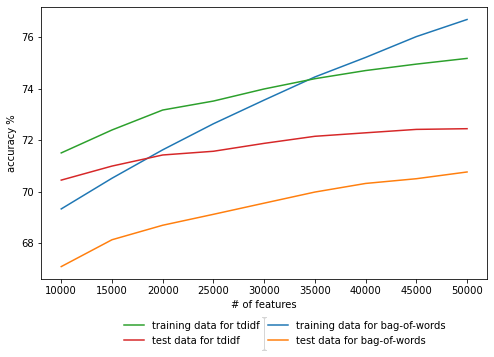

In [63]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv4,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv4,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf4, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf4, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv7,palette='dark',label="training data for bag-of-words")
sns.lineplot(n,test_acc_cv7,palette='dark',label="test data for bag-of-words")
sns.lineplot(n,train_acc_tf7, palette='dark',label="training data for tdidf")
sns.lineplot(n,test_acc_tf7, palette='dark',label="test data for tdidf")

#plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='center', borderaxespad=0.,ncol=2, mode="expand")

plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [ ]:
print(train_acc_cv7)
print(test_acc_cv7)
print(train_acc_tf7)
print(test_acc_tf7)

In [ ]:
print(mean(train_acc_cv7))
print(mean(test_acc_cv7))
print(mean(train_acc_tf7))
print(mean(test_acc_tf7))

In [ ]:
#for logistic regression

min_ngram=1
max_ngram=2

num_features=10000

train_acc_cv8=[]
test_acc_cv8=[]
train_acc_tf8=[]
test_acc_tf8=[]


for i in range(9):
    
    print("no of features=",i)
    X_train1, X_test1, y_train1, y_test1=train_test_split(k1[i], final_df['label'], test_size=0.25, random_state=0)

    X_train2, X_test2, y_train2, y_test2=train_test_split(k2[i], final_df['label'], test_size=0.25, random_state=0)

    
    [a1,b1]=logistic_regression(X_train1,y_train1,X_test1,y_test1)
    [a2,b2]=logistic_regression(X_train2,y_train2,X_test2,y_test2)
    
    train_acc_cv8.append(a1)
    test_acc_cv8.append(b1)
    train_acc_tf8.append(a2)
    test_acc_tf8.append(b2)

In [ ]:
plt.figure(figsize=(8,5))
n=range(10000,55000,5000)
# plt.plot(n,train_acc_cv4,"-b",label="training data for count vectors")
# plt.plot(n,test_acc_cv4,"-r",label="test data for count vectors")
# plt.plot(n,train_acc_tf4, "-g",label="training data for tdif")
# plt.plot(n,test_acc_tf4, "-c",label="test data for tdif")

sns.lineplot(n,train_acc_cv8,palette='dark',label="training data for bag-of-words")
sns.lineplot(n,test_acc_cv8,palette='dark',label="test data for bag-of-words")
sns.lineplot(n,train_acc_tf8, palette='dark',label="training data for tdidf")
sns.lineplot(n,test_acc_tf8, palette='dark',label="test data for tdidf")

#plt.legend(loc="upper left",prop={"size":8})
#plt.title("line chart of e")
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='center', borderaxespad=0.,ncol=2, mode="expand")

plt.xlabel("# of features")
plt.ylabel("accuracy %")

In [ ]:
print(train_acc_cv8)
print(test_acc_cv8)
print(train_acc_tf8)
print(test_acc_tf8)

In [ ]:
print(mean(train_acc_cv8))
print(mean(test_acc_cv8))
print(mean(train_acc_tf8))
print(mean(test_acc_tf8))

In [1]:
# df_p=pd.concat([data_p['condition'],df])
conditions=['Birth Control', 'Depression','Pain', 'Anxiety', 'Acne']
# df_p.head()

def m_d(condition):
    df_c=df[df['condition']==condition]
    vect=CountVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=20000)
#     tf=TfidfVectorizer(analyzer='word',tokenizer=None,preprocessor=None, stop_words=None,min_df=2, ngram_range=(1,2),max_features=20000)
    df_p=vect.fit_transform(df_c['review_clean'])
    X_train,X_test,y_train,y_test=train_test_split(df_p, df_c['label'], test_size=0.25, random_state=0)
    return X_train, X_test, y_train, y_test
    

In [2]:
X_BC_train,X_BC_test, y_BC_train, y_BC_test = m_d('Birth Control')
X_D_train, X_D_test, y_D_train, y_D_test = m_d('Depression')
X_P_train, X_P_test, y_P_train, y_P_test = m_d('Pain')
X_A_train, X_A_test, y_A_train, y_A_test = m_d('Anxiety')
X_Dia_train, X_Dia_test, y_Dia_train, y_Dia_test = m_d('Diabetes, Type 2')

NameError: name 'df' is not defined

In [ ]:
train_str_Inputs = [['X_BC_train', 'y_BC_train'],['X_D_train', 'y_D_train'], ['X_P_train','y_P_train'], ['X_A_train','y_A_train'],['X_Dia_train','y_Dia_train']]
test_str_Inputs = [['X_BC_test','y_BC_test'], ['X_D_test','y_D_test'],['X_P_test','y_P_test'],['X_A_test','y_A_test'],['X_Dia_test','y_Dia_test']]
     
string_combination= [t+j for j in test_str_Inputs for t in train_str_Inputs]


 
train_var_Inputs= [(X_BC_train, y_BC_train),(X_D_train, y_D_train), (X_P_train,y_P_train), (X_A_train,y_A_train),(X_Dia_train,y_Dia_train)]
test_var_Inputs = [(X_BC_test,y_BC_test), (X_D_test,y_D_test),(X_P_test,y_P_test),(X_A_test,y_A_test),(X_Dia_test,y_Dia_test)]
var_combination= [t+j for j in test_var_Inputs for t in train_var_Inputs]

In [ ]:
#v = CountVectorizer(analyzer = "word", ngram_range= (1,2))
dicti= {}
dicti['train']=[]
dicti['test']=[]
dicti['accuracy']=[]

for i , (X_train, y_train,X_test,  y_test) in zip(string_combination, var_combination):
#         print('-'*100)
    print(i)
#         print('-'*100)
        
        
#         train_features= v.fit_transform(X_train)

#         test_features=v.transform(X_test)
#         dense_features=train_features.toarray()
#         dense_test= test_features.toarray()

    lr=LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000,multi_class='auto')
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
       
    dicti['train'].append(i[0][2:4])
    dicti['test'].append(i[3][2:4])
    dicti['accuracy'].append(float(accuracy))  
    print('Accuracy = ' +str(accuracy))
    

In [ ]:
cross_domain= pd.DataFrame.from_dict(dicti)
cross_domain['test'].unique()

abbreviation= ['BC', 'D_', 'P_', 'A_', 'Di']

cross_domain.replace(to_replace=abbreviation, value=conditions,inplace=True)

cross_data_logistic=cross_domain.pivot_table(values='accuracy', index= 'train', columns='test')

In [ ]:
cross_data_logistic_s= cross_data_logistic.reindex(index=['Depression', 'Anxiety','Pain', 'Birth Control','Diabetes, Type 2' ],columns= ['Depression', 'Anxiety','Pain', 'Birth Control','Diabetes, Type 2' ])
cross_data_logistic_s['avg train accuracy']=cross_data_logistic_s[cross_data_logistic_s.columns[::-1]].mean(axis=1)
cross_data_logistic_s.loc['avg test accuracy']=cross_data_logistic_s[cross_data_logistic_s.columns[::-1]].mean(axis=0)
cross_data_logistic_s